#  Machine Learning Practice

In this study, a dataset with 108 features has been used and tried to guess one of nine classes. There is no spesific explanation about the columns in the dataset. All the values are in numeric format.

## Importing Libraries

Required libraries are added. Mostly the well-known ML library called sklearn has been employed in this work. In order to optimize hyperparameters of
some techniques such as LightLGM, a library called Optuna has been used.

The libraries below are for general purposes such as data frame manipulation, using math functions, formatting etc.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
import numpy as np
import warnings
from math import floor
warnings.filterwarnings('ignore')

We have mostly employed machine learning techniques from sklearn library. One can see the used approaches in this work by looking at the cell below. 

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

This part is mostly for the evaluation of the approaches we have applied. For example we need to import confusion matrix feature from sklearn.metrics in order to have more detailed information rather than only looking at the accuracy score. 

log_loss performance metric has been also used in this work in order to evaluate out performances in a wider persprective.

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV

The libraries are mostly imported for special-purposes. For example lightgbm is a method of which we have taken advantage in this work. The results are promising. 

On the other hand, we have tried to take advantage of the hyper-parameter optimization libraries such as optuna in this example. bayes_opt can also be used for this purpose. Especially when optimizing the parameters of a neural network.

In [37]:
import lightgbm as lgb
from sklearn.manifold import TSNE
import optuna #Optuna is an automatic hyperparameter optimization software framework, particularly designed for machine learning.
from optuna.samplers import TPESampler
import pickle
import sklearn

SyntaxError: invalid syntax (2471984999.py, line 6)

In [36]:
# version of the libraries
print('pandas version: ' , pd.__version__)
print('seaborn version: ' , sns.__version__)
print('numpy version: ' , np.__version__)
print('optuna version: ' , optuna.__version__)
print('lgb version: ' , lgb.__version__)
print('sklearn version: ' , sklearn.__version__)

pandas version:  2.0.3
seaborn version:  0.12.2
numpy version:  1.24.3
optuna version:  3.6.1
lgb version:  4.3.0
sklearn version:  1.3.0


In [15]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv') # this is not validation data
example_data = pd.read_csv('example.csv') # in this work, the output must be like this file 

print('number of data points in the train data: ' , len(train_data))
print('number of data points in the test data: ' , len(test_data))

print('shape of the train data: ' , train_data.shape)
print('shape of the test data: ' , test_data.shape)
print("DIFFERENCE BETWEEN THE  NUMBER OF COLUMNS IN THE TRAIN AND TEST DATA ‼️")

number of data points in the train data:  62500
number of data points in the test data:  150000
shape of the train data:  (62500, 109)
shape of the test data:  (150000, 108)
DIFFERENCE BETWEEN THE  NUMBER OF COLUMNS IN THE TRAIN AND TEST DATA ‼️


In [16]:
train_data.head(5)

x_1  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  ...  x_100  x_101  \
0  0.0  0.0  0.0  0.2  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1  0.2  0.8  0.0  0.0  0.0  0.0  0.6  0.2  0.0   0.0  ...    0.2    0.0   
2  0.0  0.0  0.0  0.4  0.0  0.0  3.2  0.0  0.0   0.0  ...    0.0    0.0   
3  0.0  0.0  0.2  0.0  0.0  0.0  0.2  0.0  0.0   0.0  ...    0.0    0.0   
4  0.0  0.0  0.4  0.0  0.0  0.0  0.4  0.0  0.0   0.6  ...    0.0    0.0   

   x_102  x_103  x_104  x_105  x_106  x_107  x_108  y  
0    0.2    0.0    0.0    0.0    0.0    0.0    0.0  3  
1    0.8    0.0    0.0    0.0    0.0    0.0    0.0  9  
2    0.6    0.0    0.0    0.0    0.0    0.0    0.0  3  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  3  
4    0.0    0.6    0.2    0.0    0.0    0.2    0.0  9  

[5 rows x 109 columns]

In [7]:
test_data.head(5)

x_1  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  ...  x_99  x_100  x_101  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.8  0.0  0.0   0.0  ...   0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.4  0.2  0.0  0.0   0.0  ...   0.0    0.0    0.6   
2  0.2  0.0  0.2  0.0  0.0  0.0  0.4  0.0  0.4   0.4  ...   0.0    0.0    0.2   
3  0.0  0.0  0.0  0.2  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0    0.0   
4  0.0  0.2  0.0  2.8  0.0  0.2  0.0  0.0  0.2   0.0  ...   0.0    0.0    0.0   

   x_102  x_103  x_104  x_105  x_106  x_107  x_108  
0    0.0    0.2    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.2    0.0    0.0    0.2    0.0  
2    0.0    0.0    0.0    0.6    0.0    0.0    4.4  
3    0.8    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.2  

[5 rows x 108 columns]

## Preprocessing

One should check whether we are working with an imbalance dataset

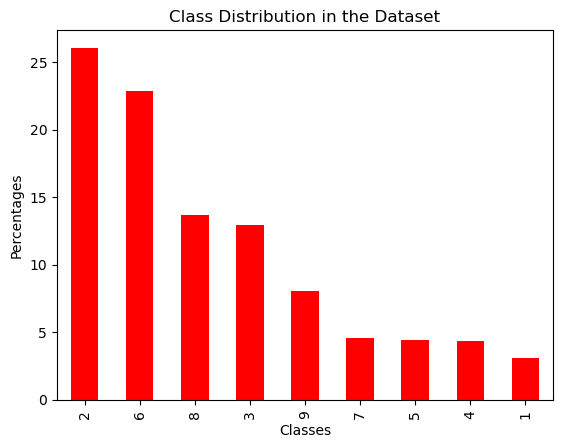

In [17]:
class_counts = train_data['y'].value_counts()
class_percentages = class_counts / len(train_data) * 100
class_percentages.plot(kind='bar', color='red')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Percentages')
plt.title('Class Distribution in the Dataset')

# Show the plot
plt.show()

### Correlation among Features

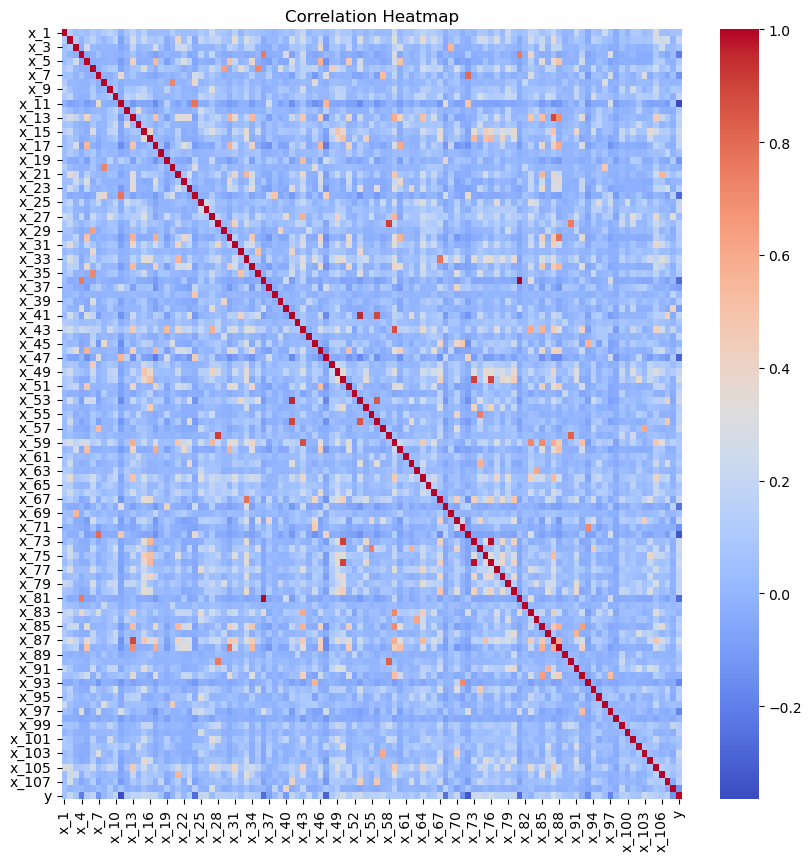

In [18]:
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

the code below is for an ad-hoc analysis. There is a relatively large mismatch between class 2 and class 3. One can investigate this further if it is needed

In [22]:

# train_data_sub = train_data[(train_data['y'] == 2) | (train_data['y'] == 3)]
# train_data_sub = train_data_sub.reset_index(drop=True)
# corr_matrix = train_data_sub.corr()
# plt.figure(figsize=(10, 10))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [19]:
train_data[train_data.columns[1:]].corr()['y'][:].sort_values(ascending=False)

y       1.000000
x_87    0.261362
x_50    0.253853
x_76    0.241530
x_53    0.235274
          ...   
x_81   -0.258775
x_24   -0.265928
x_47   -0.293908
x_72   -0.330005
x_11   -0.365018
Name: y, Length: 108, dtype: float64

## Feature Engineering

### Variance Threshold

One can change the threshold value and see the results accordingly 

In [21]:
X = train_data.iloc[:,0:107]
vt = VarianceThreshold(threshold=0.05) ### !!!!!!!!!!
vt.fit(X)

# find the features that meet the variance threshold
mask = vt.get_support()
chosen_features = list(X.loc[:, mask].columns)
removed_features = [feature for feature in X.columns if feature not in chosen_features]

# show the chosen and removed features
print('Chosen features: ', chosen_features)
print('Removed features: ', removed_features)

Chosen features:  ['x_2', 'x_4', 'x_6', 'x_7', 'x_8', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_19', 'x_20', 'x_21', 'x_23', 'x_24', 'x_25', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_49', 'x_50', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_62', 'x_64', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_80', 'x_81', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_89', 'x_90', 'x_92', 'x_93', 'x_94', 'x_97', 'x_98', 'x_100', 'x_101', 'x_102', 'x_103', 'x_104', 'x_105']
Removed features:  ['x_1', 'x_3', 'x_5', 'x_9', 'x_18', 'x_22', 'x_26', 'x_34', 'x_42', 'x_48', 'x_51', 'x_61', 'x_63', 'x_65', 'x_79', 'x_82', 'x_91', 'x_95', 'x_96', 'x_99', 'x_106', 'x_107']


In [22]:
if(False):    
    test_data = test_data[chosen_features]
    print(len(chosen_features))
    chosen_features.append('y')
    print(len(chosen_features))
    train_data = train_data[chosen_features]
     

### TSNE

The main motivation adding using this approach is to add some new features to the current dataset. By checking the performance of the used ml techniques, we can end up with an result whether this approach is useful in terms of accuracy or some other performance measure. 

Another reason to employ this technique is to visualize our datataset in two and three dimensions. By looking at the visuals, one can easily observe that class 2 and class 3 are showing similar features. One can also see this behaviour is looking at the confusion matrices of the used machine learning techniques. 

**Probably this won't finish immmediately**. You may want to check the details of this feature reduction technique. Here were trying to achieve some useful features by using this technique.

In [23]:
X_train_tsne = TSNE(n_components=2, learning_rate="auto", perplexity=100, verbose=1).fit_transform(train_data.drop(['y'], axis = 1))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 62500 samples in 0.046s...
[t-SNE] Computed neighbors for 62500 samples in 14.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 62500
[t-SNE] Computed conditional probabilities for sample 2000 / 62500
[t-SNE] Computed conditional probabilities for sample 3000 / 62500
[t-SNE] Computed conditional probabilities for sample 4000 / 62500
[t-SNE] Computed conditional probabilities for sample 5000 / 62500
[t-SNE] Computed conditional probabilities for sample 6000 / 62500
[t-SNE] Computed conditional probabilities for sample 7000 / 62500
[t-SNE] Computed conditional probabilities for sample 8000 / 62500
[t-SNE] Computed conditional probabilities for sample 9000 / 62500
[t-SNE] Computed conditional probabilities for sample 10000 / 62500
[t-SNE] Computed conditional probabilities for sample 11000 / 62500
[t-SNE] Computed conditional probabilities for sample 12000 / 62500
[t-SNE] Computed conditional probabilities for s

In [11]:

X_test_tsne = TSNE(n_components=2, learning_rate="auto", perplexity=100, verbose=1).fit_transform(test_data)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 150000 samples in 0.091s...
[t-SNE] Computed neighbors for 150000 samples in 76.572s...
[t-SNE] Computed conditional probabilities for sample 1000 / 150000
[t-SNE] Computed conditional probabilities for sample 2000 / 150000
[t-SNE] Computed conditional probabilities for sample 3000 / 150000
[t-SNE] Computed conditional probabilities for sample 4000 / 150000
[t-SNE] Computed conditional probabilities for sample 5000 / 150000
[t-SNE] Computed conditional probabilities for sample 6000 / 150000
[t-SNE] Computed conditional probabilities for sample 7000 / 150000
[t-SNE] Computed conditional probabilities for sample 8000 / 150000
[t-SNE] Computed conditional probabilities for sample 9000 / 150000
[t-SNE] Computed conditional probabilities for sample 10000 / 150000
[t-SNE] Computed conditional probabilities for sample 11000 / 150000
[t-SNE] Computed conditional probabilities for sample 12000 / 150000
[t-SNE] Computed conditional proba

In [ ]:
if(False):
    print(type(X_train_tsne))
    # convert X_tsne to dataframe
    X_tsne_train_df = pd.DataFrame(X_train_tsne)
    X_tsne_test_df = pd.DataFrame(X_test_tsne)
    # add X_tsne_df to train_data and test_data by changing the column names as tsn1_1 and tsn1_2
    train_data['tsn1_1'] = X_tsne_train_df[0] 
    train_data['tsn1_2'] = X_tsne_train_df[1]
    test_data['tsn1_1'] = X_tsne_test_df[0]
    test_data['tsn1_2'] = X_tsne_test_df[1]   
print('Shape of train_data: ', train_data.shape)
print('Shape of test_data: ', test_data.shape)

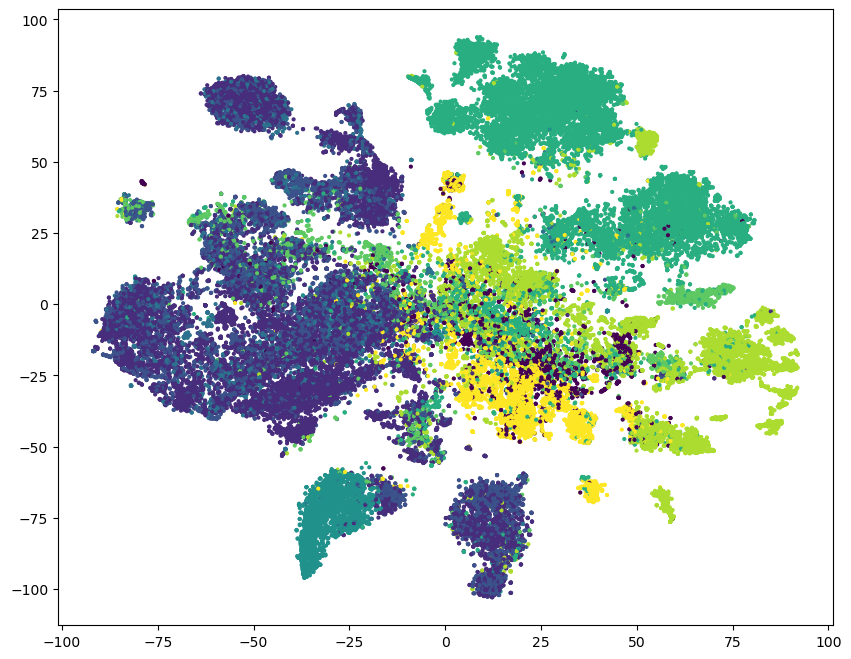

In [24]:
plt.figure(figsize=(10, 8))

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_data['y'], s=4)

In [ ]:
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': X_train_tsne[:,0], 'tsne_2': X_train_tsne[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=120)
lim = (X_tsne.min()-5, X_tsne.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [ ]:
X_train_tsne_3d = TSNE(n_components=3, learning_rate="auto", perplexity=100, verbose=1).fit_transform(train_data.drop(['y'], axis = 1))

In [20]:
# combine X_tsne with the y column of train_data
X_tsne_df = pd.DataFrame(X_train_tsne_3d)
X_tsne_df['y'] = train_data['y']
X_tsne_df.columns = ['f1','f2','f3','y']
X_tsne_df["y"] = X_tsne_df["y"].astype(str)
fig = px.scatter_3d(X_tsne_df, x='f1', y='f2', z='f3',color='y')
fig.update_traces(marker=dict(size=5))
fig.show()

## Machine Learning Models

The code below is dividing the train data set into two subsets which are called train and test-more precisely validation- data sets. The percentage can be changed easily in the arguments. Here 80%-20% has been used for respectivelly train and test. 

One can also add cross validation approach here. Such as k-fold cross validation. 

In [25]:
X = train_data.drop(['y'], axis = 1)
y = train_data['y']
number_f_class = len(y.unique())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print("number of classes: ", number_f_class)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

number of classes:  9
(50000, 108) (12500, 108) (50000,) (12500,)


### K-nearest Classifier

In [26]:
log_los_values = []
for i in range(160,165):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    predicted_test = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)
    log_loss_value = log_loss(y_test, y_proba)
    print("step ", i, " log loss: ", log_loss_value)


AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [32]:
knn = KNeighborsClassifier(n_neighbors = 150).fit(X_train, y_train) 

predicted = knn.predict(X_test)
predicted_train = knn.predict(X_train)

accuracy_train = accuracy_score(predicted_train, y_train)
accuracy_test = accuracy_score(predicted, y_test)

print(f'Accuracy_train: {accuracy_train}')
print(f'Accuracy_test: {accuracy_test}')
print(confusion_matrix(y_test, predicted))
print(confusion_matrix(y_train, predicted_train))
y_proba = knn.predict_proba(X_test)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value = log_loss(y_test, y_proba)
print(type(log_loss_value))
print(f"knn Log Loss: {log_loss_value}")

AttributeError: 'Flags' object has no attribute 'c_contiguous'

### Logistic Regression

In [20]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

predicted = logisticRegr.predict(X_test)
predicted_train = logisticRegr.predict(X_train)

accuracy_train = accuracy_score(predicted_train, y_train)
accuracy_test = accuracy_score(predicted, y_test)

print(f'Accuracy_train: {accuracy_train}')
print(f'Accuracy_test: {accuracy_test}')
print(confusion_matrix(y_test, predicted))
print(confusion_matrix(y_train, predicted_train))
y_proba = logisticRegr.predict_proba(X_test)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value = log_loss(y_test, y_proba)
print(f"logistic regression Log Loss: {log_loss_value}")

Accuracy_train: 0.76576
Accuracy_test: 0.76632
[[ 160   23    1    0    2   27   12   64   91]
 [   2 2920  318   21   11    7   18   16    7]
 [   1 1084  451   14    0    3   31   10    4]
 [   0  276   37  190    4   30   12    3    1]
 [   0   22    1    0  526    1    0    1    1]
 [  17   21    5   11    0 2743   29   55   54]
 [  15   88   39    6    6   57  287   43    1]
 [  37   15    6    0    2   47   16 1480   27]
 [  36   22    1    0    2   50    7   50  822]]
[[  677    79     1     0     3   141    37   271   365]
 [   14 11403  1186   110    49    43    86    43    29]
 [    0  4285  1961    74     0    17   114    31     9]
 [    2  1179   151   680    19    79    49     1     5]
 [    0   121     2     0  2079     0     0     6     3]
 [   65   123    18    42     1 10452   151   292   185]
 [   48   384   153    22    10   256  1315   128    16]
 [  149   110    28     0     3   202    68  6258    92]
 [  106    93     4     3     4   153    17   182  3463]]
logist

### Naive Bayes Classifier

In [9]:
gnb = GaussianNB().fit(X_train, y_train) 
predicted = gnb.predict(X_test)
predicted_train = gnb.predict(X_train)

accuracy_train = accuracy_score(predicted_train, y_train)
accuracy_test = accuracy_score(predicted, y_test)

print(f'Accuracy_train: {accuracy_train}')
print(f'Accuracy_test: {accuracy_test}')



Accuracy_train: 0.62322
Accuracy_test: 0.63096


### SVM - RBF (Radial Basis Function)

In a support vector machine (SVM), C and gamma are parameters that help to determine the shape of the decision boundary that separates the different classes in the data. C is a regularization parameter that controls the trade-off between achieving a low training error and a low testing error. A smaller value of C creates a wider margin and allows more training errors, while a larger value of C creates a narrower margin and penalizes training errors more heavily.Gamma, on the other hand, determines the shape of the decision boundary. It defines the influence of a single training example and how far the influence of each example reaches. A small gamma results in a more generalized decision boundary, while a large gamma results in a more complex decision boundary that can potentially overfit the training data.

from ChatGPT

The code below will take some time to be completed. Approximately 15 minutes depending on the computer.

In [6]:
svm_model_linear = SVC(kernel = 'rbf', C = 1, probability=True).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

svm_predictions_train = svm_model_linear.predict(X_train)

# model accuracy for X_train
accuracy_svmlinear_train = svm_model_linear.score(X_train, y_train) 

# model accuracy for X_test   
accuracy_svmlinear_test = svm_model_linear.score(X_test, y_test) 

print(f'Accuracy_train: {accuracy_svmlinear_train}')
print(f'Accuracy_test: {accuracy_svmlinear_test}')

Accuracy_train: 0.79104
Accuracy_test: 0.77792


In [ ]:
print(confusion_matrix(y_test, svm_predictions))
print(confusion_matrix(y_train, svm_predictions_train))
y_proba = svm_model_linear.predict_proba(X_test)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value = log_loss(y_test, y_proba)
print(f"logistic regression Log Loss: {log_loss_value}")

### Decision Tree Model

In [19]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [15, 17, 19, 21, 23, 25, 30],
    'min_samples_leaf': [50, 100, 200, 5000, 1000],
    'criterion': ["gini", "entropy"]
}

In [20]:
# Instantiate the grid search model
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True) #this is needed to compare models by their log losses
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = LogLoss)

In [21]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 70 candidates, totalling 280 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=18,
                                              min_samples_split=400,
                                              random_state=15),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 17, 19, 21, 23, 25, 30],
                         'min_samples_leaf': [50, 100, 200, 5000, 1000]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=1)

In [ ]:
grid_search.best_estimator_

In [22]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.583017      0.019689         0.036208        0.007087   
1       1.445103      0.023974         0.030491        0.002739   
2       1.053889      0.016709         0.036060        0.002620   
3       0.322159      0.008728         0.026648        0.005856   
4       0.765370      0.015874         0.027735        0.003252   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini              15                     50   
1            gini              15                    100   
2            gini              15                    200   
3            gini              15                   5000   
4            gini              15                   1000   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 15, 'min_sa...          -1.047925   
1  {'criterion': 'gini', 'max_depth': 15, 'min_sa...          -1.028634   
2  {'criterion': 'gini', 'max_depth': 15, 'min_sa...          -1.070696   
3  {'criterion': 'gini', 'max_depth': 15, 'min_sa...          -1.576227   
4  {'criterion': 'gini', 'max_depth': 15, 'min_sa...          -1.153849   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0          -1.075897          -1.097529          -1.072308        -1.073415   
1          -1.049778          -1.137319          -1.076564        -1.073074   
2          -1.064629          -1.104588          -1.039059        -1.069743   
3          -1.563925          -1.569188          -1.571817        -1.570289   
4          -1.146679          -1.146011          -1.136511        -1.145762   

   std_test_score  rank_test_score  
0        0.017597               15  
1        0.040796               14  
2        0.023360               12  
3        0.004453               64  
4        0.006162               43

In [23]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
17       1.063330      0.014260         0.030923        0.002620   
22       1.042795      0.017629         0.033745        0.004089   
27       1.054579      0.014973         0.029973        0.002567   
32       1.062053      0.007982         0.031318        0.002413   
7        1.070255      0.013169         0.032282        0.004023   

   param_criterion param_max_depth param_min_samples_leaf  \
17            gini              21                    200   
22            gini              23                    200   
27            gini              25                    200   
32            gini              30                    200   
7             gini              17                    200   

                                               params  split0_test_score  \
17  {'criterion': 'gini', 'max_depth': 21, 'min_sa...          -1.076535   
22  {'criterion': 'gini', 'max_depth': 23, 'min_sa...          -1.076535   
27  {'criterion': 'gini', 'max_depth': 25, 'min_sa...          -1.076535   
32  {'criterion': 'gini', 'max_depth': 30, 'min_sa...          -1.076535   
7   {'criterion': 'gini', 'max_depth': 17, 'min_sa...          -1.076482   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
17          -1.054008          -1.097860          -1.032641        -1.065261   
22          -1.054008          -1.097860          -1.032641        -1.065261   
27          -1.054008          -1.097860          -1.032641        -1.065261   
32          -1.054008          -1.097860          -1.032641        -1.065261   
7           -1.051085          -1.098773          -1.034736        -1.065269   

    std_test_score  rank_test_score  
17        0.024395                1  
22        0.024395                1  
27        0.024395                1  
32        0.024395                1  
7         0.024401                5

In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=21, min_samples_leaf=200,
                       min_samples_split=400, random_state=15)

In [17]:
#class_weights = {1: 1, 2: 1, 3: 2, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1}
d_tree = DecisionTreeClassifier(random_state = 15, max_depth = 20, min_samples_split = 200, criterion="entropy")
d_tree.fit(X_train, y_train)
predicted = d_tree.predict(X_test)
predicted_train = d_tree.predict(X_train)
accuracy_train = accuracy_score(predicted_train, y_train)
accuracy_test = accuracy_score(predicted, y_test)
print(f'Accuracy_train: {accuracy_train}')
print(f'Accuracy_test: {accuracy_test}')
y_proba = d_tree.predict_proba(X_test)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value = log_loss(y_test, y_proba)
print(f"Decision Tree Log Loss: {log_loss_value}")

Accuracy_train: 0.72512
Accuracy_test: 0.7068
Decision Tree Log Loss: 1.1847812510087627


In [ ]:
#classes = [str(x) for x in train_data['y'].unique().tolist()]
#fig = plt.figure(figsize = (20, ))
#_ = tree.plot_tree(model, feature_names = X.columns.values.tolist(),class_names = classes, filled = True)
#fig.savefig("decision_tree.png")

### Balanced Bagging Classifier

In [12]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=12)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
predicted_train = classifier.predict(X_train)
accuracy_train = accuracy_score(predicted_train, y_train)
accuracy_test = accuracy_score(predicted, y_test)
print(f'Accuracy_train: {accuracy_train}')
print(f'Accuracy_test: {accuracy_test}')
print(confusion_matrix(y_test, predicted))
print(confusion_matrix(y_train, predicted_train))



Accuracy_train: 0.8652
Accuracy_test: 0.7508
[[ 239   18    4    5    3   12   19   32   48]
 [   8 3112   91   60    5    7   27    6    4]
 [   7 1170  328   52    2    3   32    2    2]
 [   1  264   12  254    1   12    7    2    0]
 [   1   15    0    2  530    0    2    0    2]
 [  99   57   11   33    6 2551   76   45   57]
 [  34   80   21   18    5   22  335   22    5]
 [ 120   59   10   11    7   47   57 1282   37]
 [ 117   50    3    5    0   18   11   32  754]]
[[ 1562     0     0     0     0     2     3     1     6]
 [    0 12952     3     4     0     0     4     0     0]
 [   19  3631  2613   123     2     9    79     7     8]
 [    0   204    13  1939     1     6     2     0     0]
 [    1    16     0     0  2192     0     1     0     1]
 [  279   216    39   116    11 10079   225   191   173]
 [   19    77     8     9     2    17  2192     7     1]
 [  272   183    26    21    11   115   128  6066    88]
 [  129    90     2     6     9    39    23    62  3665]]


### FeedForward Neural Network - sckitlearn

In [4]:
hidden_layer_sizes = [100,150,250]
max_iter = [2500]
learning_rate = [0.001, 0.005, 0.01]
alpha=[0.001, 0.0001]
activation_funcs = ['logistic'] 
solvers = ['lbfgs']

In [ ]:
settings_list = []
for hidden_layer in hidden_layer_sizes:
    for iter in max_iter:
        for learn_rate in learning_rate:
            for active_func in activation_funcs:
                for solv in solvers:
                    for alp in alpha:
                        mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer,), max_iter=iter, learning_rate_init=learn_rate, activation=active_func, solver=solv, alpha=alp, random_state=1)
                        mlp.fit(X_train, y_train)
                        predicted = mlp.predict(X_test)
                        predicted_train = mlp.predict(X_train)
                        accuracy_train = accuracy_score(predicted_train, y_train)
                        accuracy_test = accuracy_score(predicted, y_test)
                        # print(f'Accuracy_train: {accuracy_train}')
                        # print(f'Accuracy_test: {accuracy_test}')
                        y_proba = mlp.predict_proba(X_test)
                        log_loss_test = log_loss(y_test, y_proba)
                        y_proba_train = mlp.predict_proba(X_train)
                        log_loss_train = log_loss(y_train, y_proba_train)
                        settings_dict = {'hl': hidden_layer, 'mi': iter, 'lr': learn_rate, 'af': active_func, 'sv': solv, 'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'log_loss_test': log_loss_test, 'log_loss_train': log_loss_train}
                        settings_list.append(settings_dict)
                        print(settings_list[-1])
                    

In [ ]:
activation_funcs = ['identity', 'logistic', 'tanh', 'relu'] 
solvers = ['lbfgs', 'sgd', 'adam']
nn = MLPClassifier(hidden_layer_sizes=(500), activation='logistic', solver='lbfgs', alpha=0.001,
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.005, power_t=0.5, max_iter=1400, 
                    shuffle=True, random_state=11, tol=0.000001, verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, early_stopping=True, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                    n_iter_no_change=25, max_fun=15000)
nn.fit(X_train, y_train)
score = nn.score(X_test, y_test)
print("Accuracy:", score)
y_pred_test = nn.predict(X_test)
y_pred_train = nn.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
print(f'Accuracy_train: {accuracy_train}')
print(f'Accuracy_test: {accuracy_test}')
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))


y_proba = nn.predict_proba(X_test)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value = log_loss(y_test, y_proba)
print(f"Neural Network Log Loss: {log_loss_value}")


### FeedForward Neural Network - Keras

In [ ]:
# Create function
# The following code creates the objective function containing 
# the Neural Network model. The function will return returns the score of the cross-validation.
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score


In [ ]:
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}

# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

In [ ]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

### LightGBM Model

In [20]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": number_f_class,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.LGBMClassifier(**param)
    gbm.fit(X_train, y_train)
    preds = gbm.predict(X_test)
    accuracy_test = accuracy_score(y_test, preds)
    return accuracy_test

In [ ]:

#this part has already been run and we took the required results which are the best parameters
sampler = TPESampler(seed=10)
study = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=50)
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial:', study.best_trial)

In [22]:
# these are the best parameters that have been found by optuna
# best_parameters = {'lambda_l1': 5.117571145089835e-06, 'lambda_l2': 0.08753895882464374, 'num_leaves': 199, 'feature_fraction': 0.606773610653303, 'bagging_fraction': 0.8462643326394661, 'bagging_freq': 2, 'min_child_samples': 89}
best_parameters = {'lambda_l1': 0.128070987555928, 'lambda_l2': 3.1488957830792917e-06, 'num_leaves': 180, 'feature_fraction': 0.6302482400741398, 'bagging_fraction': 0.9979000611889808, 'bagging_freq': 2, 'min_child_samples': 66}

lgbm = lgb.LGBMClassifier(**best_parameters)
#lgbm = lgb.LGBMClassifier(**study.best_params)
lgbm.fit(X_train, y_train)
predicted = lgbm.predict(X_test)
predicted_train = lgbm.predict(X_train)
accuracy_train = accuracy_score(predicted_train, y_train)
accuracy_test = accuracy_score(predicted, y_test)
print(f'Accuracy_train: {accuracy_train}')
print(f'Accuracy_test: {accuracy_test}')
print(confusion_matrix(y_test, predicted))
print(confusion_matrix(y_train, predicted_train))

y_proba = lgbm.predict_proba(X_test)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value = log_loss(y_test, y_proba)
print(f"LGBMC Log Loss: {log_loss_value}")

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.128070987555928, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.128070987555928
[LightGBM] [Warning] feature_fraction is set=0.6302482400741398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6302482400741398
[LightGBM] [Warning] bagging_fraction is set=0.9979000611889808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9979000611889808
[LightGBM] [Warning] lambda_l2 is set=3.1488957830792917e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1488957830792917e-06
Accuracy_train: 0.9878
Accuracy_test: 0.83456
[[ 214    7    0    0    1   27   15   47   69]
 [   1 2833  413   35    1    8   18    4    7]
 [   0  585  938   38    0    5   29    2    1]
 [   0  147   61  318    1   17    7    2    0]
 [   1   10    0    1  539    0    0    0    1]
 [   9   16    4    1    0 2815 

#### THIS PART IS FOR CREATING THE FINAL DELIVERY

In [ ]:
pd.options.display.float_format = '{:.10f}'.format #the reason to add this format is that we are trying not to use the probabilities with a scientific format

In [5]:
y_probability_final = lgbm.predict_proba(test_data)

In [6]:
y_probability_final = pd.DataFrame(y_probability_final ,columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
y_probability_final.head(5)

c1           c2           c3           c4           c5  \
0 0.0000228995 0.4788933556 0.5190286515 0.0018078550 0.0000201671   
1 0.0000001805 0.0000027835 0.0000052295 0.0000005393 0.0000000942   
2 0.0006541911 0.6512843509 0.3039246295 0.0363659532 0.0000145390   
3 0.0002312321 0.0002400645 0.0000590851 0.0002807585 0.0000138374   
4 0.0000136809 0.0497871942 0.0876082636 0.8622524970 0.0000070552   

            c6           c7           c8           c9  
0 0.0001349947 0.0000265217 0.0000357280 0.0000298269  
1 0.0000116264 0.0000013067 0.9999768461 0.0000013938  
2 0.0008026751 0.0049829059 0.0016067204 0.0003640350  
3 0.9968207339 0.0002366007 0.0004585852 0.0016591026  
4 0.0000463739 0.0001185237 0.0001441131 0.0000222984

In [7]:
y_probability_final.to_csv('y_probability_final.csv', index=False, float_format='%.10f')

In [ ]:
print(lgbm.feature_importances_)

In [ ]:
print(y_proba[1])



## Stacking Ensemble Model

In [ ]:
lr_meta = LogisticRegression(multi_class='multinomial', max_iter=2000, random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('gnb', gnb), ('dt', dt), ('lgbm', lgbm)],
    final_estimator=lr_meta,
    cv=5  # Number of cross-validation folds
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the accuracy of the stacking classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy}")


# Make predictions (probabilities) on the test set
y_proba = stacking_clf.predict_proba(X_test)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value = log_loss(y_test, y_proba)
print(f"Stacking Classifier Log Loss: {log_loss_value}")

In [ ]:
# Make predictions (probabilities) on the test set
y_proba = stacking_clf.predict_proba(X_test)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value = log_loss(y_test, y_proba)
print(f"Stacking Classifier Log Loss: {log_loss_value}")

In [ ]:
# Make predictions (probabilities) on the test set
y_proba = stacking_clf.predict_proba(X_train)

# Evaluate the log loss of the stacking classifier (for probabilistic predictions)
log_loss_value_train = log_loss(y_train, y_proba)
print(f"Stacking Classifier Log Loss: {log_loss_value_train}")

#### MISC

In [ ]:

for hidden_layer in hidden_layer_sizes:
    for iter in max_iter:
        for learn_rate in learning_rate:
            for active_func in activation_funcs:
                for solv in solvers:
                    try :
                        mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer,), max_iter=iter, learning_rate_init=learn_rate, activation=active_func, solver=solv, random_state=1)
                        mlp.fit(X_train, y_train)
                    except:
                        print("error")
                        error_place = {'hl': hidden_layer, 'mi': iter, 'lr': learn_rate, 'af': active_func, 'sv': solv)
                        print(error_place)
                    predicted = mlp.predict(X_test)
                    predicted_train = mlp.predict(X_train)
                    accuracy_train = accuracy_score(predicted_train, y_train)
                    accuracy_test = accuracy_score(predicted, y_test)
                    # print(f'Accuracy_train: {accuracy_train}')
                    # print(f'Accuracy_test: {accuracy_test}')
                    y_proba = mlp.predict_proba(X_test)
                    log_loss_test = log_loss(y_test, y_proba)
                    y_proba_train = mlp.predict_proba(X_train)
                    log_loss_train = log_loss(y_train, y_proba_train)
                    settings_dict = {'hl': hidden_layer, 'mi': iter, 'lr': learn_rate, 'af': active_func, 'sv': solv, 'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'log_loss_test': log_loss_test, 'log_loss_train': log_loss_train}
                    settings_list.append(settings_dict)
                    print(settings_list[-1])

In [ ]:
class_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']
class_markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*']

# Create a scatter plot
plt.figure(figsize=(10, 8))

for i in range(9):
    class_df = train_data[train_data['y'] == i]
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label=f'Class {i}', color=class_colors[i], marker=class_markers[i], s=3)

# Adjust plot settings
plt.title('2D Scatter Plot with 9 Classes')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()